Simple Linear Regression

In [ ]:
Some Steps to follow
1.Read The Dataset.
2.Perform some EDA-Exploratory Data Analysis,FE-Feature Engineering.
3.Divide our Dataset into independent and Dependent features.
4.Further dicide the dataset into train and test.
5.Standard Scaling on the train and test data.
6.Model Training.
# Prediction of train and test data
#Check error and Accuracy


In [23]:
## 1.Read The Dataset.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

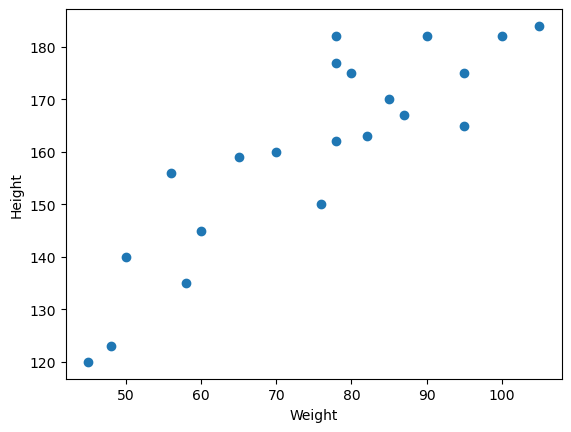

In [25]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [26]:
## 2.Perform some EDA-Exploratory Data Analysis,FE-Feature Engine
# EDA-Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  21 non-null     int64
 1   Height  21 non-null     int64
dtypes: int64(2)
memory usage: 464.0 bytes


In [27]:
df.describe()   

,Weight,Height
count,21.000000,21.000000
mean,75.285714,160.571429
std,17.533234,19.082902
min,45.000000,120.000000
25%,60.000000,150.000000
50%,78.000000,163.000000
75%,87.000000,175.000000
max,105.000000,184.000000


In [28]:
# Check null value  Feature engineeering-handle missing value
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [29]:
## 3.Divide our Dataset into independent and dependent features.
X=df[['Weight']]  # independent feature
y=df['Height']    # dependent features

In [30]:
X.shape,y.shape

((21, 1), (21,))

In [31]:
## 4.Further dicide the dataset into train and test.

from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [33]:
X_train.shape,X_test.shape

((16, 1), (5, 1))

In [34]:
y_train.shape,y_test.shape

((16,), (5,))

In [35]:
## 5.Standard Scaling on the train and test data.

from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
X_train=scaler.fit_transform(X_train)

In [38]:
X_test=scaler.transform(X_test)

In [39]:
X_test

array([[-1.97060195],
       [-0.75792383],
       [ 0.03031695],
       [-1.18236117],
       [ 1.06109336]])

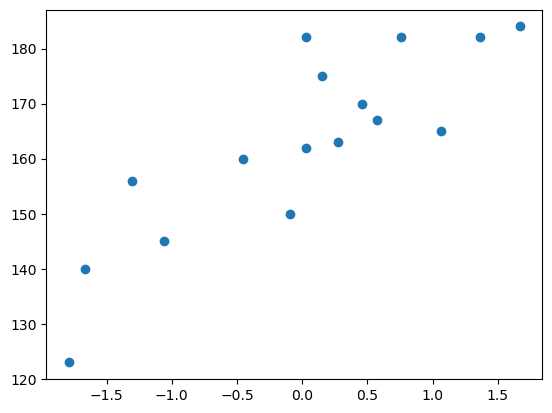

In [40]:
plt.scatter(X_train,y_train)

In [41]:
# If we get new weight then we have to perform transform first
scaler.transform([[80]])   # [[]]-2-d.  lets weight=80

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.15158477]])

In [42]:
## 6.Model Training.

from sklearn.linear_model import LinearRegression

In [43]:
regressor=LinearRegression()

In [44]:
regressor

LinearRegression()

In [45]:
## Training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [46]:
regressor.intercept_

162.875

In [47]:
regressor.coef_

array([14.12391054])

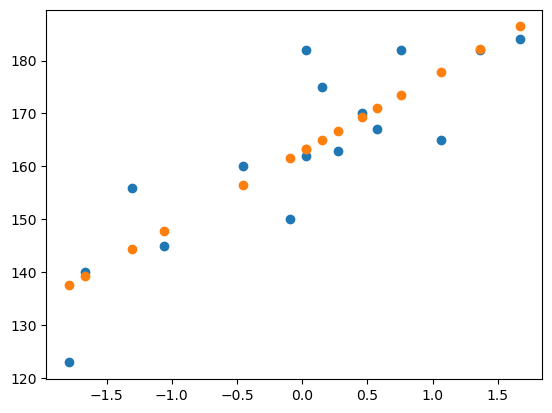

In [48]:
plt.scatter(X_train,y_train)  # to see 2d best fit line
plt.scatter(X_train,regressor.predict(X_train)) # to predict y data...it predict x_train dataset  x

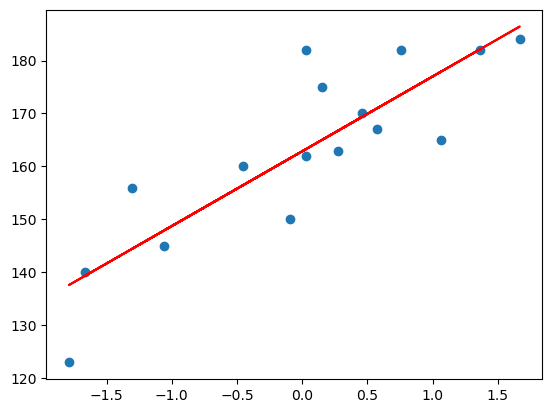

In [49]:
plt.scatter(X_train,y_train)   # to see 2d best fit line
plt.plot(X_train,regressor.predict(X_train),'r') # to predict y data...it predict x_train dataset 

### Prediction of train data
1. predicted height output = intercept + coef_(Weights)
2. y_Pred_train = 162.8 + 14.1(X_train)

### Prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_Pred_ttest= 162.8 + 14.1(X_test)

In [50]:
## Prediction for test data
y_pred_test=regressor.predict(X_test)

In [51]:
y_pred_test

array([135.0423943 , 152.17015165, 163.30319393, 146.17543658,
       177.86178768])


### Performance Metrics MAE,MSE,RMSE

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [53]:
## To check error
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

118.72063253594095
9.921254595588232
10.895899803868469


## Accuracy of the model R squared and Adjusted r squared
## R square
Formula

**R^2 = 1-SSR/SST**

- R^2 = Accuracy of the model
- SSR = sum of square of residuals
- SST = total sum of squares

In [54]:
from sklearn.metrics import r2_score

In [55]:
score=r2_score(y_test,y_pred_test)
score

0.7633915965084086

## Adjusted r squared
**Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]**

where:
    
- R2: Te R2 of the model
- n: The number of observations
- k: The number of predictor varibles

In [56]:
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6845221286778782

In [57]:
scaler

StandardScaler()

In [58]:
regressor

LinearRegression()

In [47]:
# Pickeling - to save above data in file formate